In [ ]:
# IST 718
# Group Project

In [1]:
# libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
# Read in cleaned Quantitative Data Set
whiskyQuant = pd.read_csv('projectwhisky_quant_clean.csv')
# Drop first column of unneeded numbering
whiskyQuant = whiskyQuant.drop('Unnamed: 0', axis=1)
whiskyQuant = whiskyQuant.drop('Latitude', axis=1)
whiskyQuant = whiskyQuant.drop('Longitude', axis=1)
whiskyQuant.columns = whiskyQuant.columns.str.replace(' ', '')
# Examine first few rows
whiskyQuant.head()

,Distillery,DistCode,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,%alc,review_point,price
0,Aberfeldy,0.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,46.230769,86.692308,131.000000
1,Aberlour,1.0,3.0,3.0,1.0,0.0,0.0,4.0,3.0,2.0,2.0,3.0,3.0,2.0,49.333333,87.666667,80.600000
2,AnCnoc,2.0,1.0,3.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,3.0,2.0,45.000000,89.000000,178.800000
3,Ardbeg,3.0,4.0,1.0,4.0,4.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0,50.344828,89.833333,1464.200000
4,Ardmore,4.0,2.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,50.000000,86.571429,156.428571


In [3]:
# Read in latitude and longitude for distilleries in Scotland
coords = pd.read_csv('Distillery Coordinates.csv')  
# Multiply longitude by -1 as they are all west numbers 
coords['Longitude'] = coords['Longitude']*-1
# Examine the first few rows
coords.head()

,Distillery,Longitude,Latitude
0,Aberfeldy,-3.875,56.62
1,Aberlour,-3.220,57.46
2,AnCnoc,-2.760,57.56
3,Ardbeg,-6.080,55.64
4,Ardmore,-2.670,57.32


In [4]:
whiskyMerged = pd.merge(whiskyQuant, coords, on = 'Distillery')
whiskyMerged

,Distillery,DistCode,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,%alc,review_point,price,Longitude,Latitude
0,Aberfeldy,0.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,46.230769,86.692308,131.000000,-3.875,56.62
1,Aberlour,1.0,3.0,3.0,1.0,0.0,0.0,4.0,3.0,2.0,2.0,3.0,3.0,2.0,49.333333,87.666667,80.600000,-3.220,57.46
2,AnCnoc,2.0,1.0,3.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,3.0,2.0,45.000000,89.000000,178.800000,-2.760,57.56
3,Ardbeg,3.0,4.0,1.0,4.0,4.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0,50.344828,89.833333,1464.200000,-6.080,55.64
4,Ardmore,4.0,2.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,50.000000,86.571429,156.428571,-2.670,57.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Tomatin,82.0,2.0,3.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,0.0,1.0,47.363636,85.454545,320.909091,-3.990,57.33
93,Tomintoul,83.0,0.0,3.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,43.692308,87.615385,222.923077,-2.580,56.85
94,Tormore,84.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,49.625000,84.125000,117.125000,-3.080,58.44
95,Tormore,84.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,49.625000,84.125000,117.125000,-3.410,57.38


In [5]:
# Examine data types
whiskyQuant.dtypes

Distillery       object
DistCode        float64
Body            float64
Sweetness       float64
Smoky           float64
Medicinal       float64
Tobacco         float64
Honey           float64
Spicy           float64
Winey           float64
Nutty           float64
Malty           float64
Fruity          float64
Floral          float64
%alc            float64
review_point    float64
price           float64
dtype: object

In [6]:
whiskyMerged.describe()

,DistCode,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,%alc,review_point,price,Longitude,Latitude
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,46.278351,2.072165,2.298969,1.536082,0.536082,0.113402,1.247423,1.391753,0.969072,1.484536,1.804124,1.824742,1.680412,47.617140,85.958191,355.090751,-3.786959,57.046753
std,25.831482,0.915690,0.694696,0.842391,0.979603,0.318731,0.842008,0.810821,0.906615,0.817942,0.623150,0.816628,0.860552,2.716419,2.113459,566.312806,1.081757,0.810136
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,75.500000,55.250000,-6.360000,54.860000
25%,24.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,45.666667,84.666667,124.636364,-4.260000,56.710000
50%,48.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,47.625000,86.285714,185.030769,-3.320000,57.430000
75%,70.000000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,49.625000,87.419355,282.916667,-3.110000,57.540000
max,85.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,53.285714,89.833333,3571.953488,-1.800000,58.980000


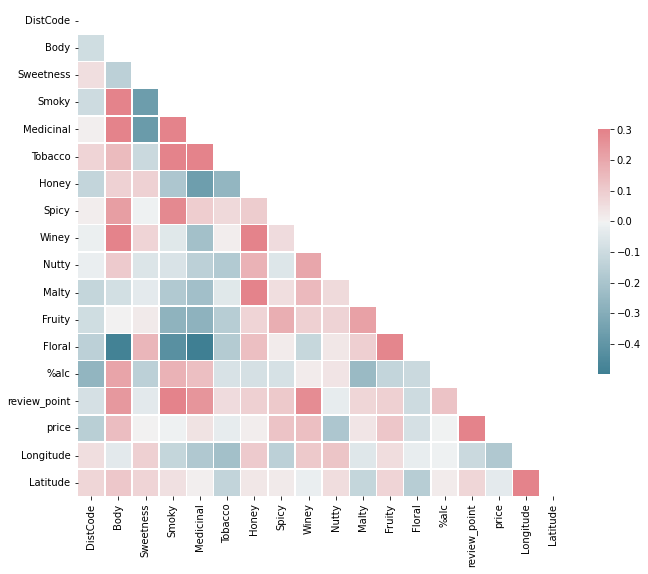

              DistCode      Body  Sweetness  ...     price  Longitude  Latitude
DistCode      1.000000 -0.090256   0.051040  ... -0.155420   0.050783  0.072694
Body         -0.090256  1.000000  -0.148896  ...  0.142932  -0.034611  0.114549
Sweetness     0.051040 -0.148896   1.000000  ...  0.000504   0.092341  0.081145
Smoky        -0.100276  0.530003  -0.365726  ... -0.004047  -0.123834  0.050124
Medicinal     0.009684  0.386090  -0.375726  ...  0.039353  -0.183408  0.009698
Tobacco       0.080894  0.150122  -0.107669  ... -0.026776  -0.217628 -0.129869
Honey        -0.126282  0.084683   0.085919  ...  0.010657   0.108896  0.027990
Spicy         0.011649  0.228095  -0.006673  ...  0.127520  -0.143648  0.019163
Winey        -0.013862  0.379142   0.080990  ...  0.138533   0.112417 -0.017157
Nutty        -0.016310  0.105814  -0.055941  ... -0.187281   0.123638  0.055454
Malty        -0.122767 -0.084501  -0.031753  ...  0.034577  -0.047011 -0.123528
Fruity       -0.092474  0.003159   0.019

In [7]:
## Take a look at correlation matrix
corr = whiskyMerged.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
print(corr)

Begin to Explore Plots

No handles with labels found to put in legend.


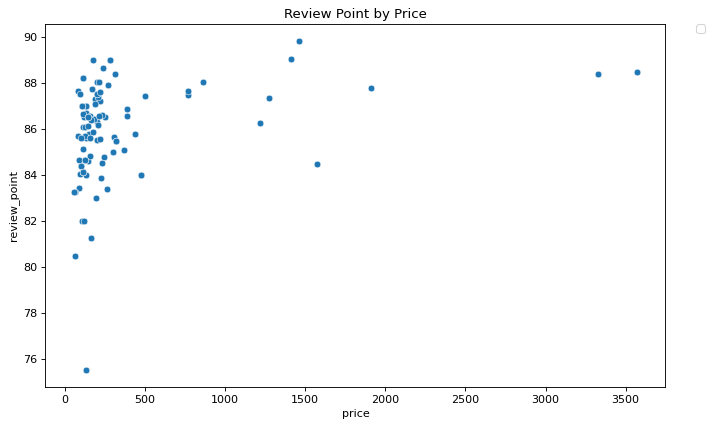

In [8]:
# Scatter Plot of price and  review_point
figure(figsize=(10, 6), dpi=80)
sns.scatterplot(x = "price", y = "review_point",
                data = whiskyMerged).set_title('Review Point by Price')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show()

No handles with labels found to put in legend.


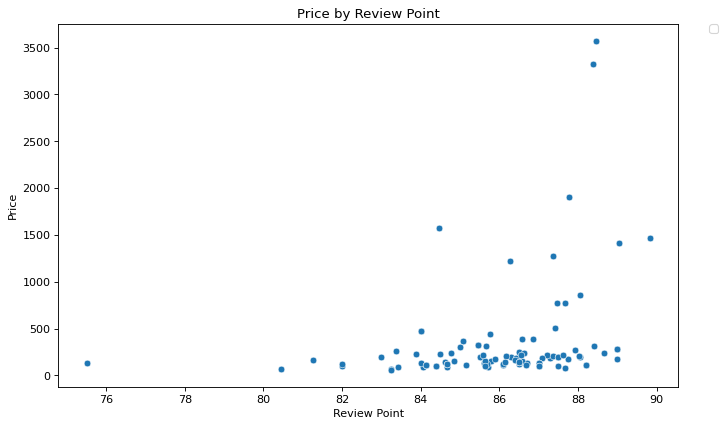

In [ ]:
# Scatter Plot of review point and price including outliers
figure(figsize=(10, 6), dpi=80)
sns.scatterplot(x = "review_point", y = "price",
                data = whiskyMerged).set_title('Price by Review Point')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.xlabel("Review Point")
plt.ylabel("Price")
plt.show()

No handles with labels found to put in legend.


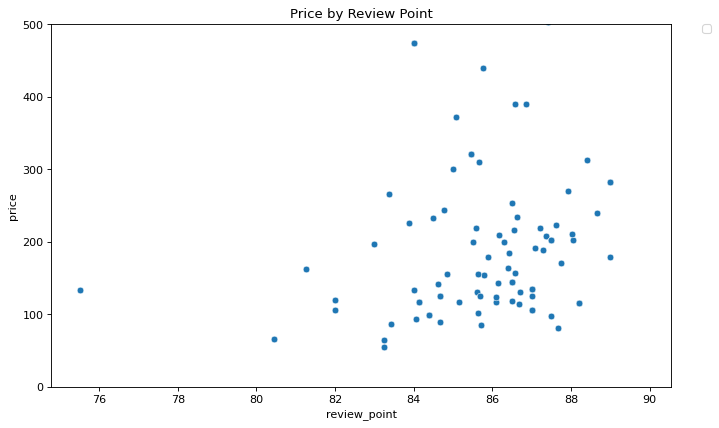

In [ ]:
# Price by Review Point without outliers
figure(figsize=(10, 6), dpi=80)
sns.scatterplot(x = "review_point", y = "price",
                data = whiskyMerged).set_title('Price by Review Point')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.ylim(0,500)
plt.show()

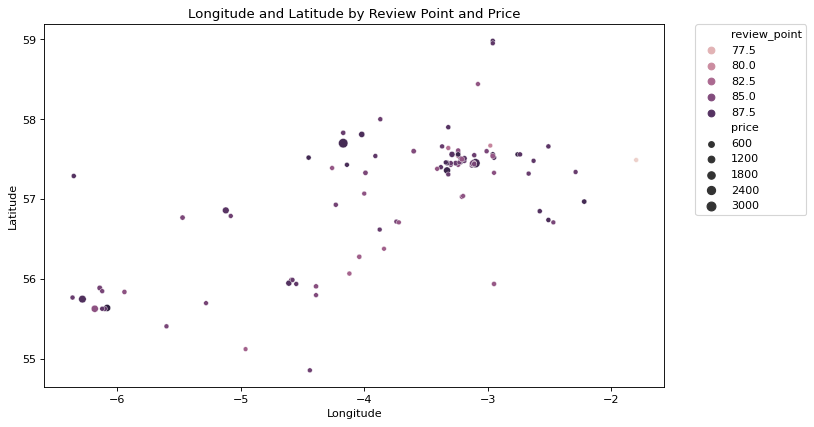

In [16]:
# Scatter Plot of longitude and latitude by Review point and price
figure(figsize=(10, 6), dpi=80)
sns.scatterplot(x = "Longitude", y = "Latitude", hue = 'review_point', size = "price",
                data = whiskyMerged).set_title('Longitude and Latitude by Review Point and Price')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

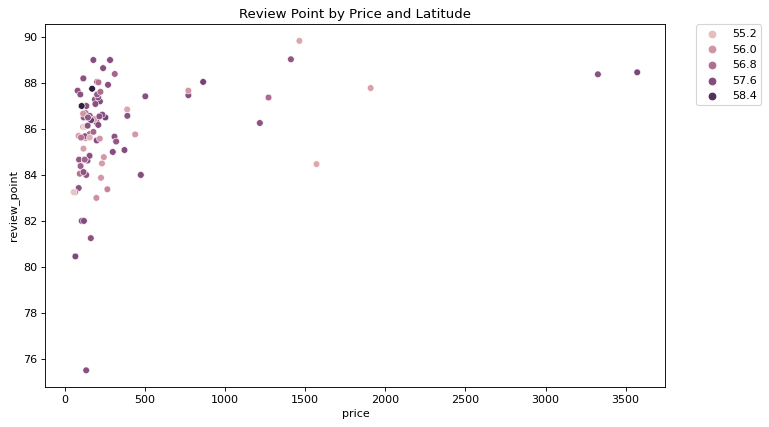

In [ ]:
# Scatter Plot of price and  review_point
figure(figsize=(10, 6), dpi=80)
sns.scatterplot(x = "price", y = "review_point", hue = "Latitude",
                data = whiskyMerged).set_title('Review Point by Price and Latitude')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show()

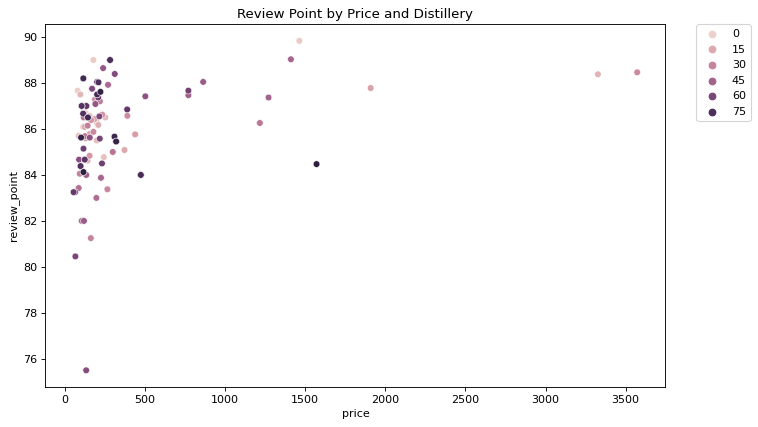

In [ ]:
# Scatter Plot of price and  review_point
figure(figsize=(10, 6), dpi=80)
sns.scatterplot(x = "price", y = "review_point", hue = "DistCode",
                data = whiskyMerged).set_title('Review Point by Price and Distillery')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show()

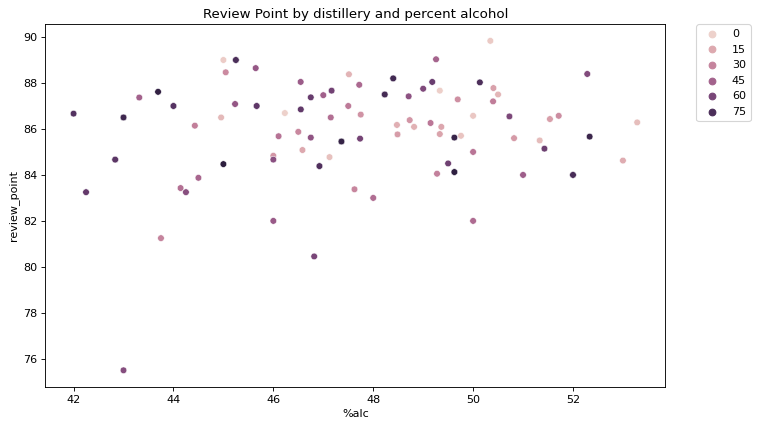

In [ ]:
# Scatter Plot of %alc, review_point, and distillery
figure(figsize=(10, 6), dpi=80)
sns.scatterplot(x = "%alc", y = "review_point", hue = "DistCode",
                data = whiskyMerged).set_title('Review Point by distillery and percent alcohol')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show()

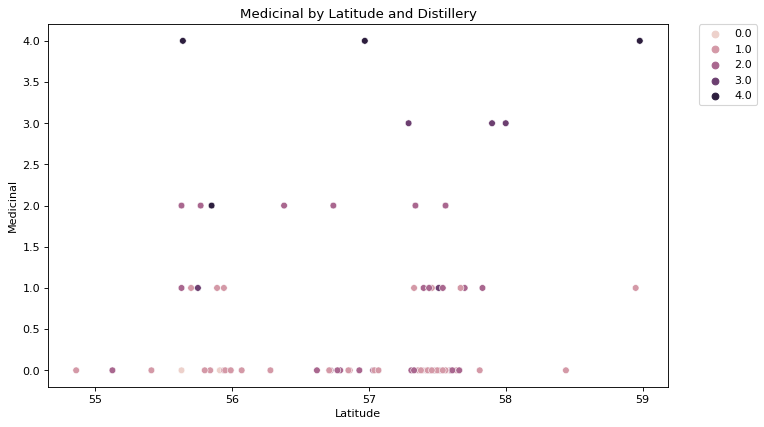

In [ ]:
# Scatter Plot of Medicinal by latitude and distillery
figure(figsize=(10, 6), dpi=80)
sns.scatterplot(x = "Latitude", y = "Medicinal", hue = "Smoky", 
                data = whiskyMerged).set_title('Medicinal by Latitude and Distillery')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show()

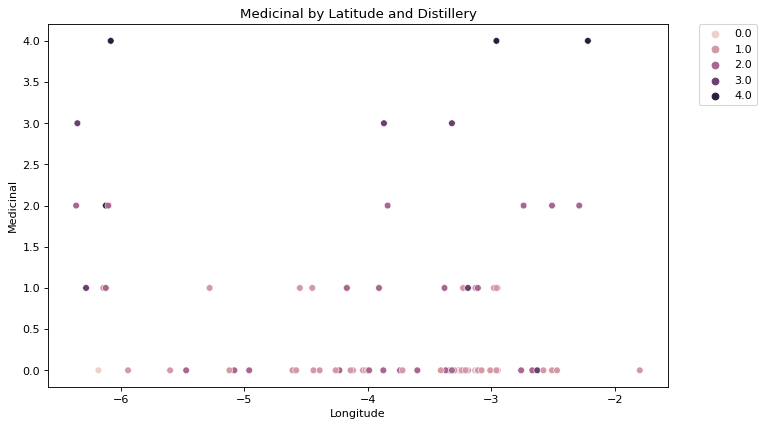

In [ ]:
# Scatter Plot of Medicinal by longitude and distillery
figure(figsize=(10, 6), dpi=80)
sns.scatterplot(x = "Longitude", y = "Medicinal", hue = "Smoky", 
                data = whiskyMerged).set_title('Medicinal by Latitude and Distillery')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show()

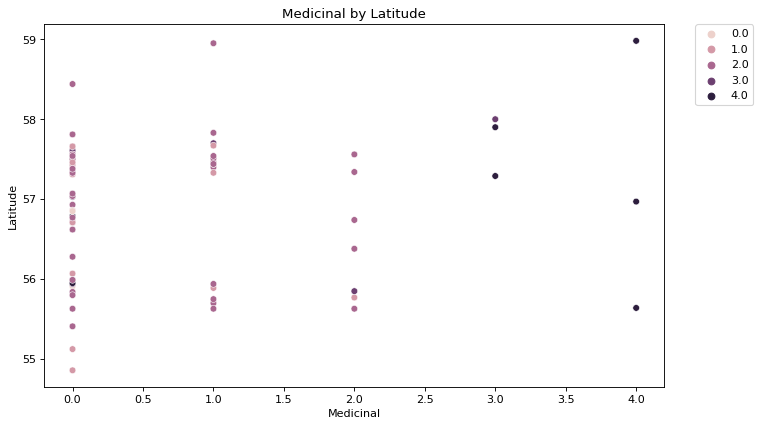

In [ ]:
# Scatter Plot of latitiude by medicinal and body
figure(figsize=(10, 6), dpi=80)
sns.scatterplot(x = "Medicinal", y = "Latitude", hue = 'Body',
                data = whiskyMerged).set_title('Medicinal by Latitude')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show()

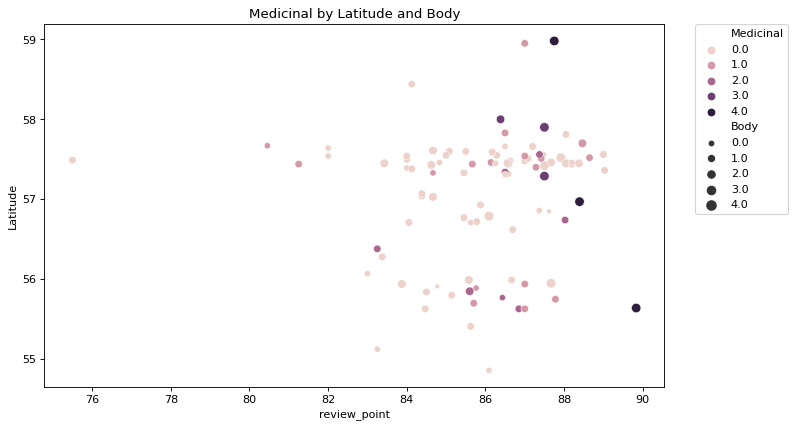

In [ ]:
# Scatter Plot of latitiude by review point, medicinal, and body
figure(figsize=(10, 6), dpi=80)
sns.scatterplot(x = "review_point", y = "Latitude", hue = 'Medicinal', size = 'Body',
                data = whiskyMerged).set_title('Medicinal by Latitude and Body')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show()

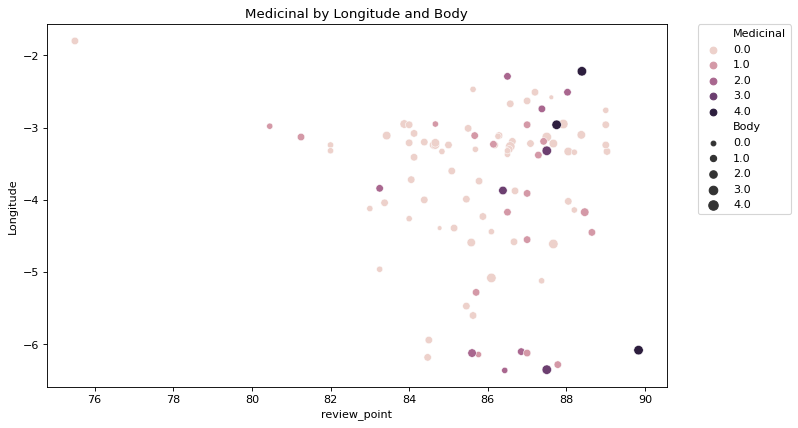

In [ ]:
# Scatter Plot of longitude by review point, medicinal, and body
figure(figsize=(10, 6), dpi=80)
sns.scatterplot(x = "review_point", y = "Longitude", hue = 'Medicinal', size = 'Body',
                data = whiskyMerged).set_title('Medicinal by Longitude and Body')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show()

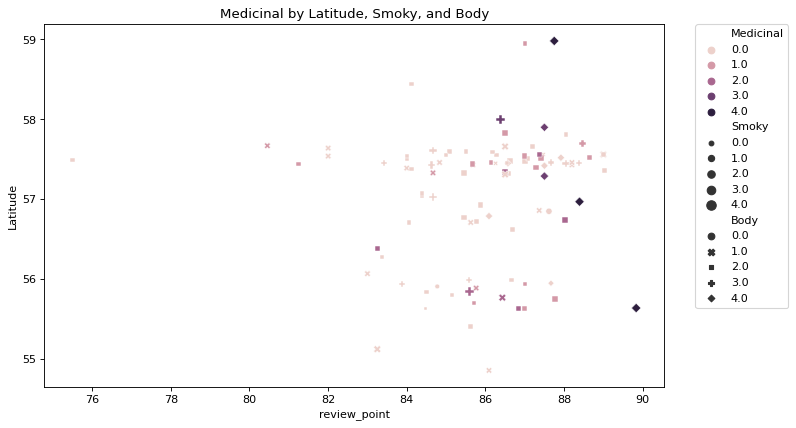

In [ ]:
# Scatter Plot of latitiude by review point, medicinal, smoky, and body
figure(figsize=(10, 6), dpi=80)
sns.scatterplot(x = "review_point", y = "Latitude", hue = 'Medicinal', size = 'Smoky',
                style = 'Body', data = whiskyMerged).set_title('Medicinal by Latitude, Smoky, and Body')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show()

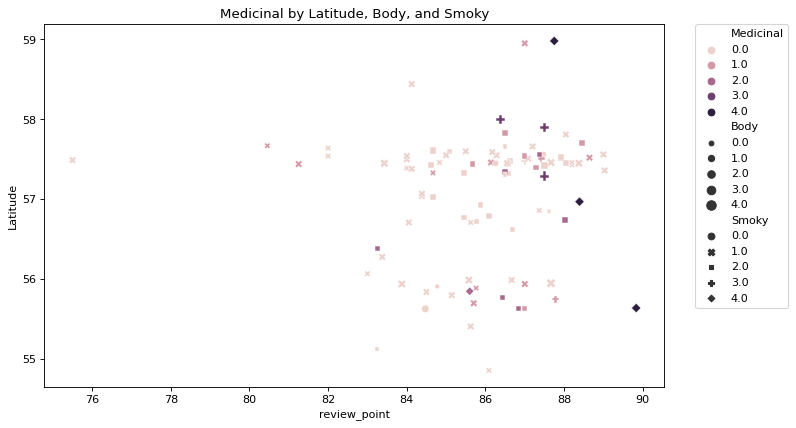

In [ ]:
# Scatter Plot of latitiude by review point, medicinal, smoky, and body
figure(figsize=(10, 6), dpi=80)
sns.scatterplot(x = "review_point", y = "Latitude", hue = 'Medicinal', size = 'Body',
                style = 'Smoky', data = whiskyMerged).set_title('Medicinal by Latitude, Body, and Smoky')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show()

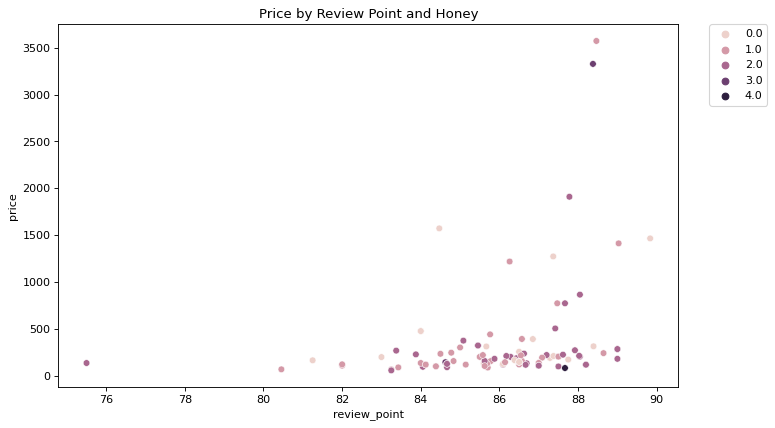

In [ ]:
# Scatter Plot of latitiude by review point, medicinal, smoky, and body
figure(figsize=(10, 6), dpi=80)
sns.scatterplot(x = "review_point", y = "price", hue = 'Honey',
                data = whiskyMerged).set_title('Price by Review Point and Honey')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show()

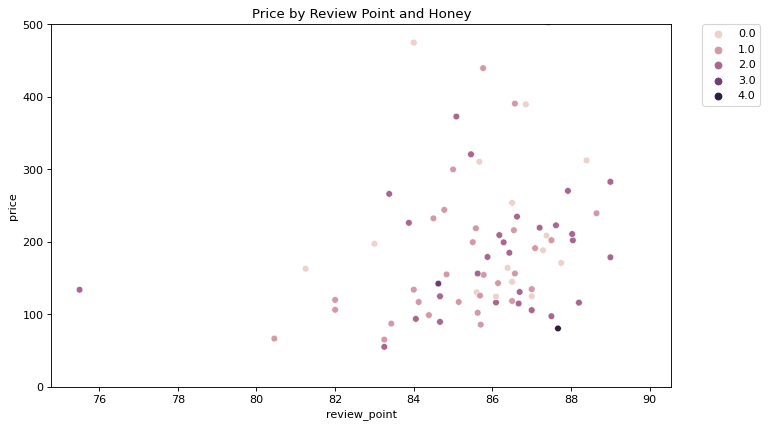

In [ ]:
# Scatter Plot of latitiude by review point, medicinal, smoky, and body (limit of 500 on price to exclude outliers)
figure(figsize=(10, 6), dpi=80)
sns.scatterplot(x = "review_point", y = "price", hue = 'Honey',
                data = whiskyMerged).set_title('Price by Review Point and Honey')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.ylim(0,500)
plt.show()

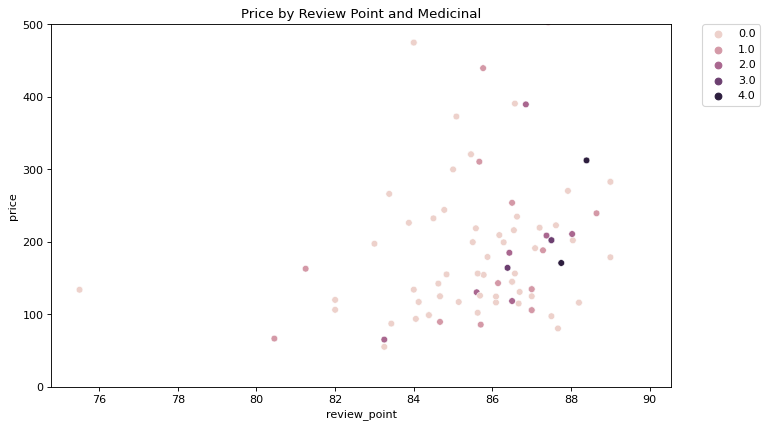

In [ ]:
# Scatter Plot of price by review point and medicinal(limit of 500 on price to exclude outliers)
figure(figsize=(10, 6), dpi=80)
sns.scatterplot(x = "review_point", y = "price", hue = 'Medicinal',
                data = whiskyMerged).set_title('Price by Review Point and Medicinal')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.ylim(0,500)
plt.show()

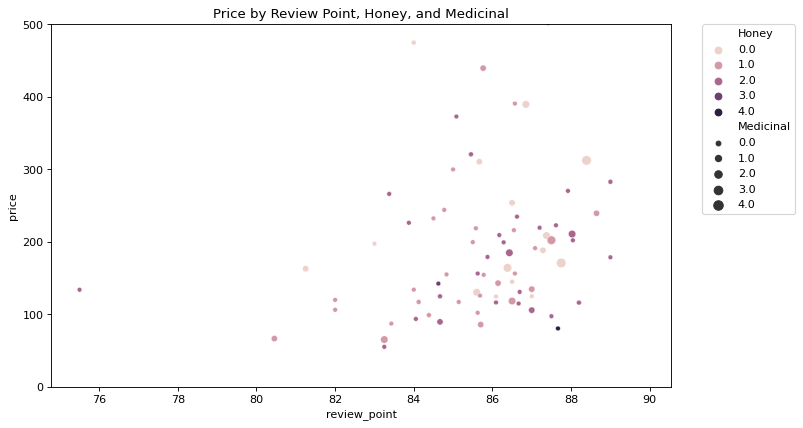

In [ ]:
# Scatter Plot of price by review point, medicinal, and honey
figure(figsize=(10, 6), dpi=80)
sns.scatterplot(x = "review_point", y = "price", hue = 'Honey', size = 'Medicinal',
                data = whiskyMerged).set_title('Price by Review Point, Honey, and Medicinal')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.ylim(0,500)
plt.show()

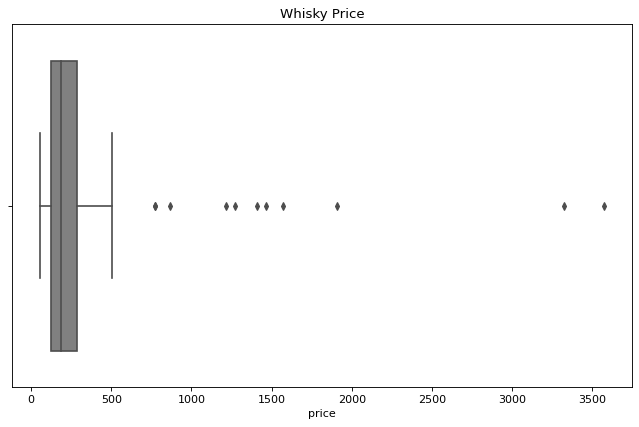

In [ ]:
# Boxplot of Price including outliers
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "price", orient = "h", data = whiskyMerged, color = 'grey').set_title('Whisky Price')
plt.show()

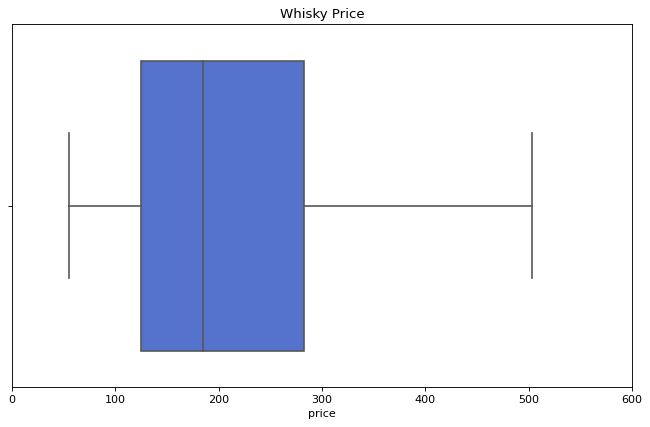

In [ ]:
# Boxplot of Price not including outliers
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "price", orient = "h", data = whiskyMerged, color = 'royalblue').set_title('Whisky Price')
plt.xlim(0,600)
plt.show()

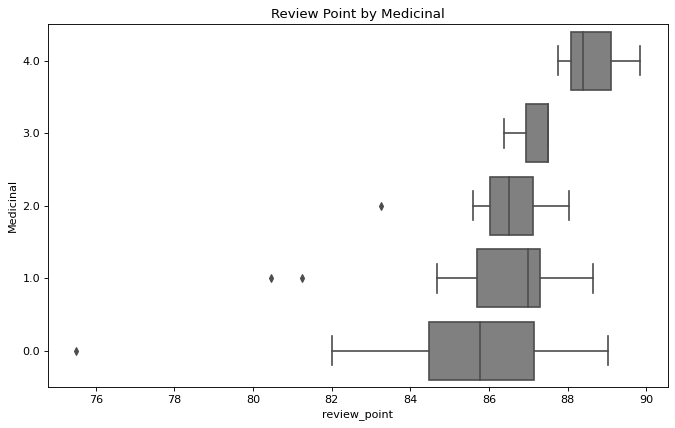

In [ ]:
# Boxplot of Review Point by Medicinal
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "review_point", y = "Medicinal", orient = "h", data = whiskyMerged, color = 'grey').set_title('Review Point by Medicinal')
plt.gca().invert_yaxis()

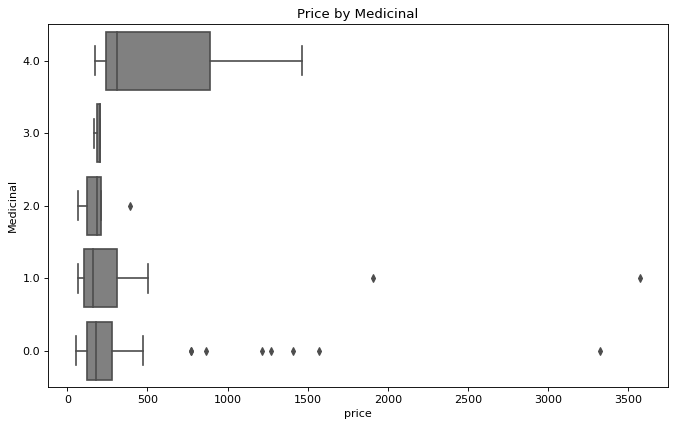

In [ ]:
# Boxplot of Price by Medicinal
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "price", y = "Medicinal", orient = "h", data = whiskyMerged, color = 'grey').set_title('Price by Medicinal')
plt.gca().invert_yaxis()

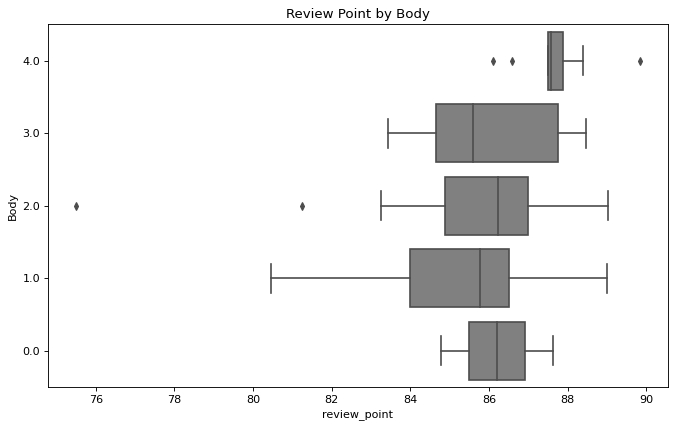

In [ ]:
# Boxplot of Review Point by Body
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "review_point", y = "Body", orient = "h", data = whiskyMerged, color = 'grey').set_title('Review Point by Body')
plt.gca().invert_yaxis()

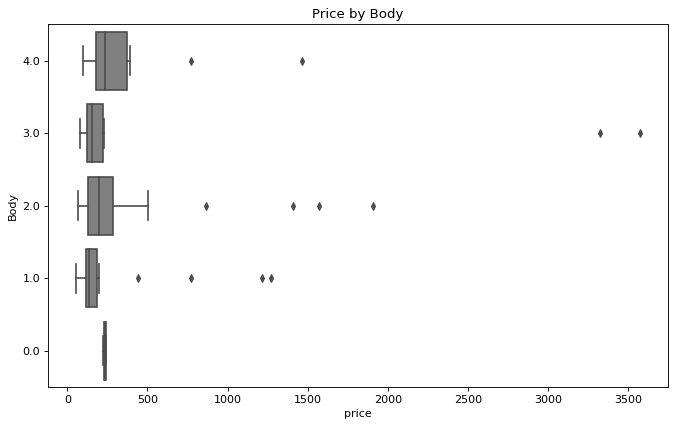

In [ ]:
# Boxplot of Price by Body
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "price", y = "Body", orient = "h", data = whiskyMerged, color = 'grey').set_title('Price by Body')
plt.gca().invert_yaxis()

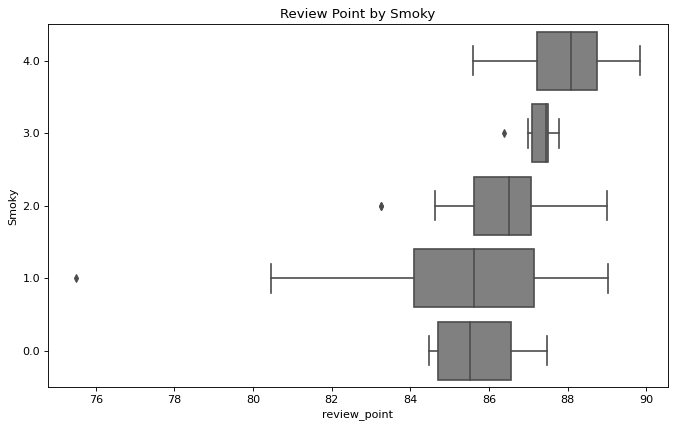

In [ ]:
# Boxplot of Review Point by Smoky
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "review_point", y = "Smoky", orient = "h", data = whiskyMerged, color = 'grey').set_title('Review Point by Smoky')
plt.gca().invert_yaxis()

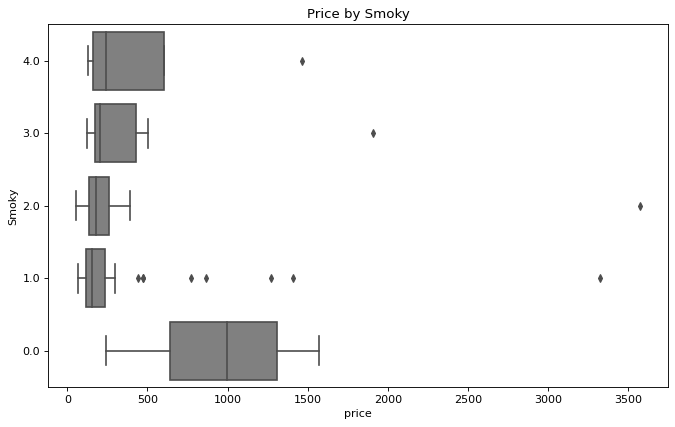

In [ ]:
# Boxplot of Price by Smoky
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "price", y = "Smoky", orient = "h", data = whiskyMerged, color = 'grey').set_title('Price by Smoky')
plt.gca().invert_yaxis()

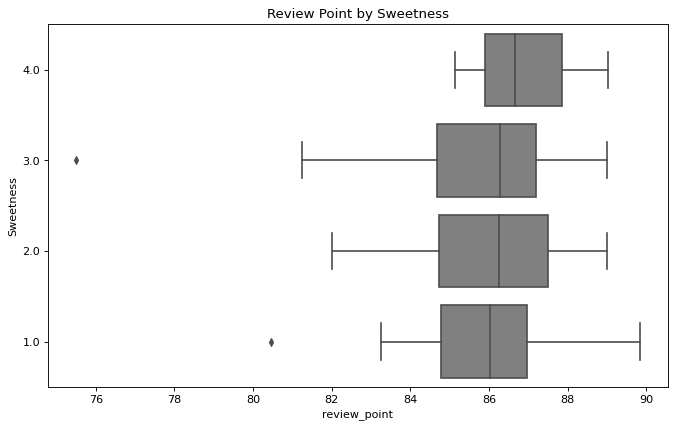

In [ ]:
# Boxplot of Review Point by Sweetness
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "review_point", y = "Sweetness", orient = "h", data = whiskyMerged, color = 'grey').set_title('Review Point by Sweetness')
plt.gca().invert_yaxis()

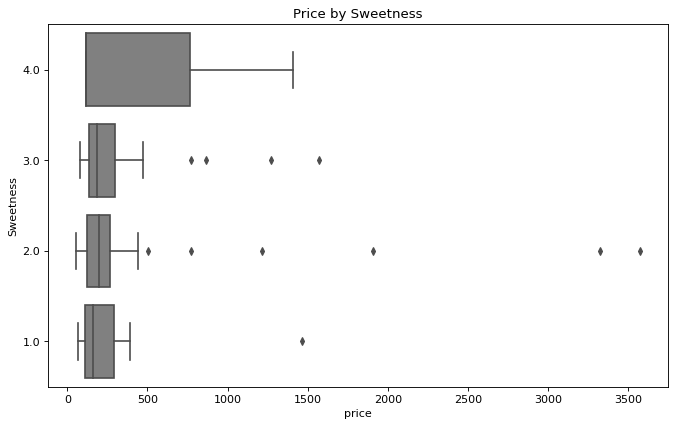

In [ ]:
# Boxplot of Price by Sweetness
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "price", y = "Sweetness", orient = "h", data = whiskyMerged, color = 'grey').set_title('Price by Sweetness')
plt.gca().invert_yaxis()

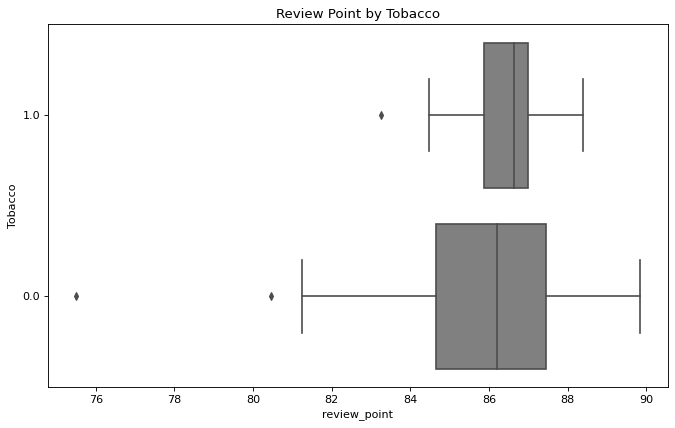

In [ ]:
# Boxplot of Review Point by Tobacco
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "review_point", y = "Tobacco", orient = "h", data = whiskyMerged, color = 'grey').set_title('Review Point by Tobacco')
plt.gca().invert_yaxis()

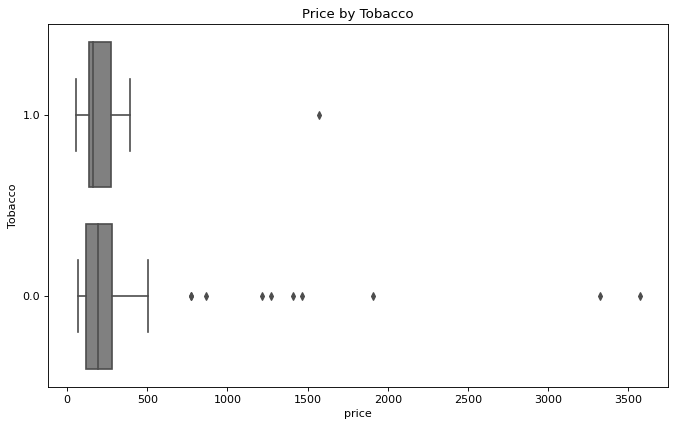

In [ ]:
# Boxplot of Price by Tobacco
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "price", y = "Tobacco", orient = "h", data = whiskyMerged, color = 'grey').set_title('Price by Tobacco')
plt.gca().invert_yaxis()

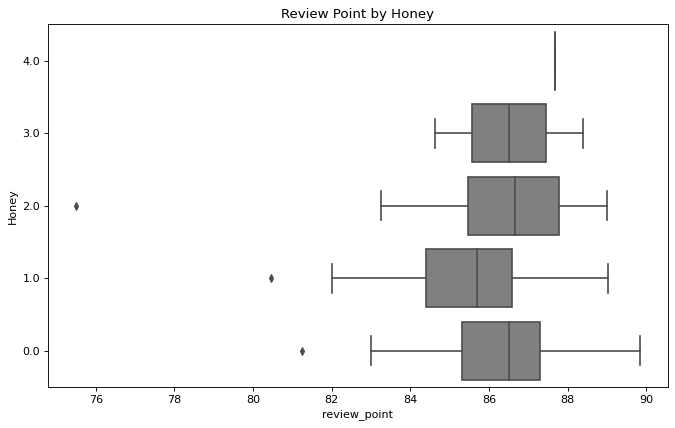

In [ ]:
# Boxplot of Review Point by Honey
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "review_point", y = "Honey", orient = "h", data = whiskyMerged, color = 'grey').set_title('Review Point by Honey')
plt.gca().invert_yaxis()

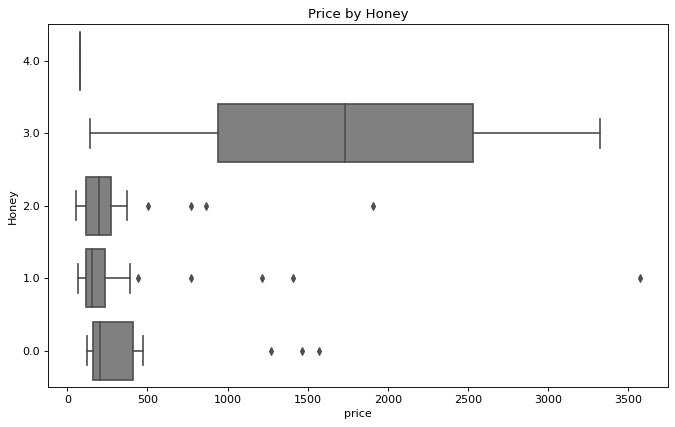

In [ ]:
# Boxplot of Price by Honey
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "price", y = "Honey", orient = "h", data = whiskyMerged, color = 'grey').set_title('Price by Honey')
plt.gca().invert_yaxis()

In [ ]:
# Boxplot of Price by Honey
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "price", y = "Honey", orient = "h", data = whiskyMerged, color = 'grey').set_title('Price by Honey')

plt.gca().invert_yaxis()

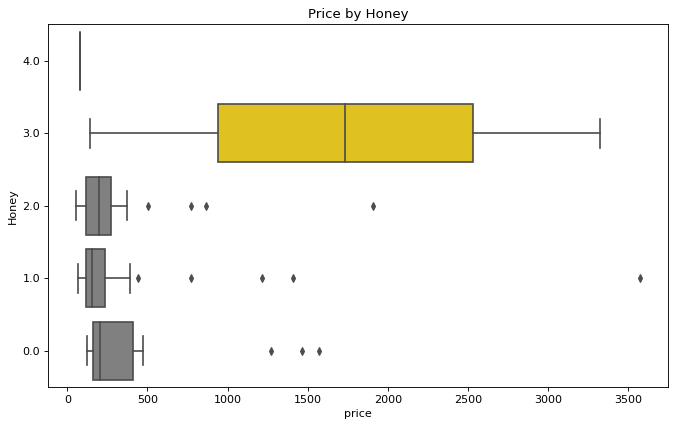

In [ ]:
# Boxplot of Price by Honey with color for standout
figure(figsize=(10, 6), dpi=80)
my_pal = {Honey: "gold" if Honey == 3.0 else "grey" for Honey in whiskyMerged.Honey.unique()}
sns.boxplot(x = "price", y = "Honey", orient = "h", data = whiskyMerged, palette=my_pal).set_title('Price by Honey')
plt.gca().invert_yaxis()

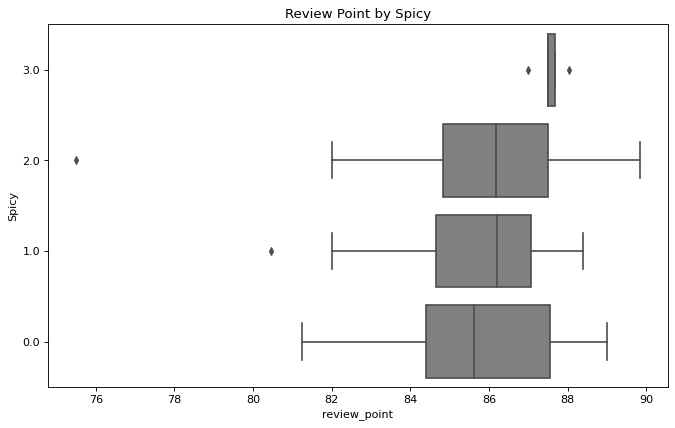

In [ ]:
# Boxplot of Review Point by Spicy
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "review_point", y = "Spicy", orient = "h", data = whiskyMerged, color = 'grey').set_title('Review Point by Spicy')
plt.gca().invert_yaxis()

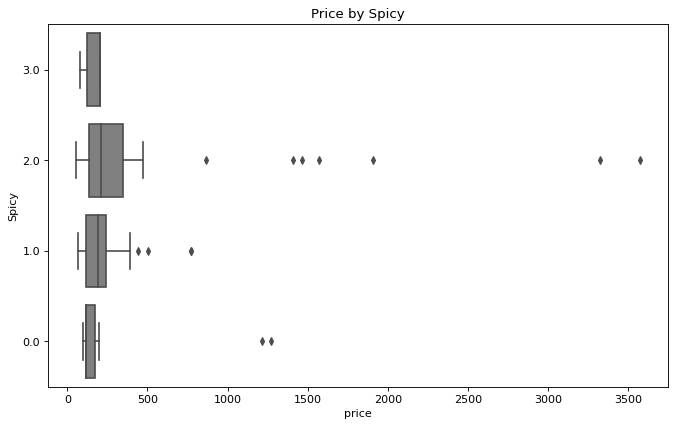

In [ ]:
# Boxplot of Price by Spicy
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "price", y = "Spicy", orient = "h", data = whiskyMerged, color = 'grey').set_title('Price by Spicy')
plt.gca().invert_yaxis()

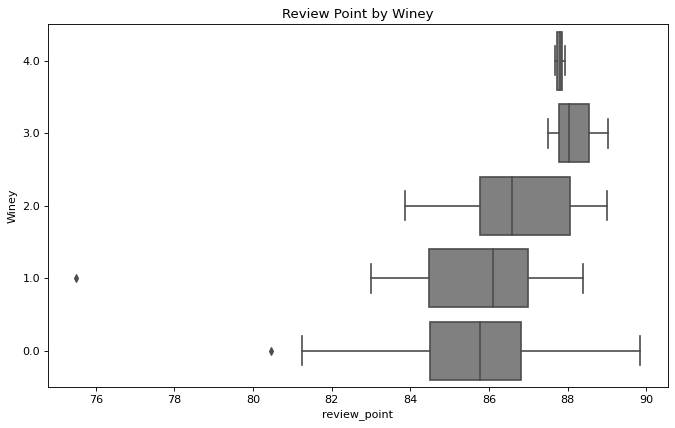

In [ ]:
# Boxplot of Review Point by Winey
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "review_point", y = "Winey", orient = "h", data = whiskyMerged, color = 'grey').set_title('Review Point by Winey')
plt.gca().invert_yaxis()

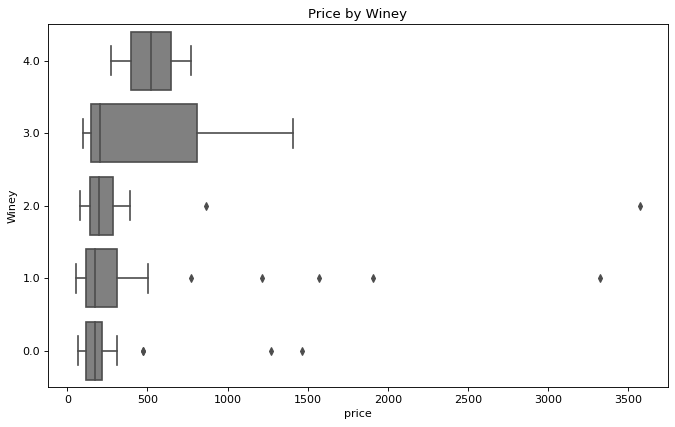

In [ ]:
# Boxplot of Price by Winey
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "price", y = "Winey", orient = "h", data = whiskyMerged, color = 'grey').set_title('Price by Winey')
plt.gca().invert_yaxis()

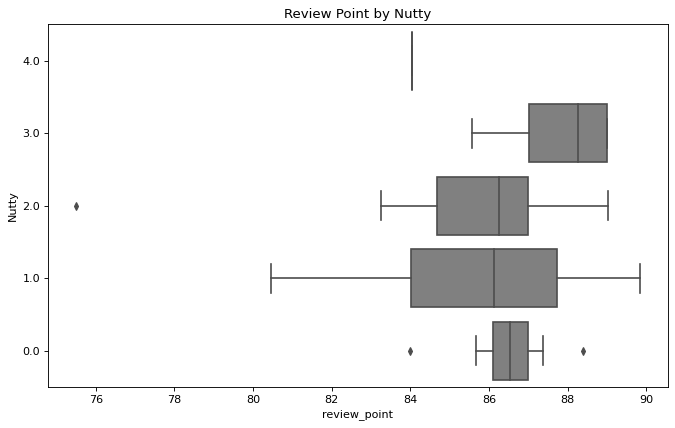

In [ ]:
# Boxplot of Review Point by Nutty
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "review_point", y = "Nutty", orient = "h", data = whiskyMerged, color = 'grey').set_title('Review Point by Nutty')
plt.gca().invert_yaxis()

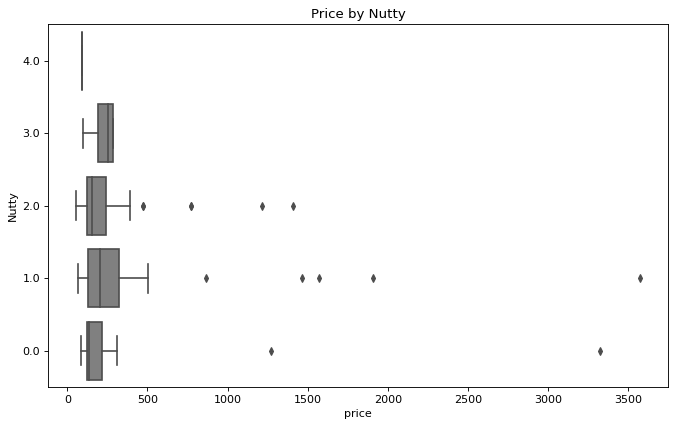

In [ ]:
# Boxplot of Price by Nutty
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "price", y = "Nutty", orient = "h", data = whiskyMerged, color = 'grey').set_title('Price by Nutty')
plt.gca().invert_yaxis()

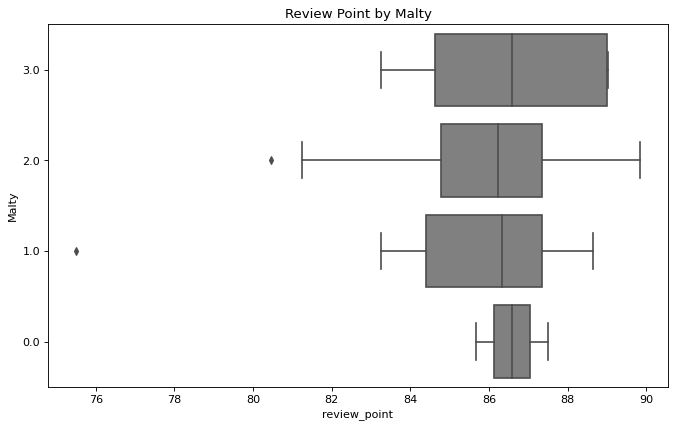

In [ ]:
# Boxplot of Review Point by Malty
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "review_point", y = "Malty", orient = "h", data = whiskyMerged, color = 'gray').set_title('Review Point by Malty')
plt.gca().invert_yaxis()

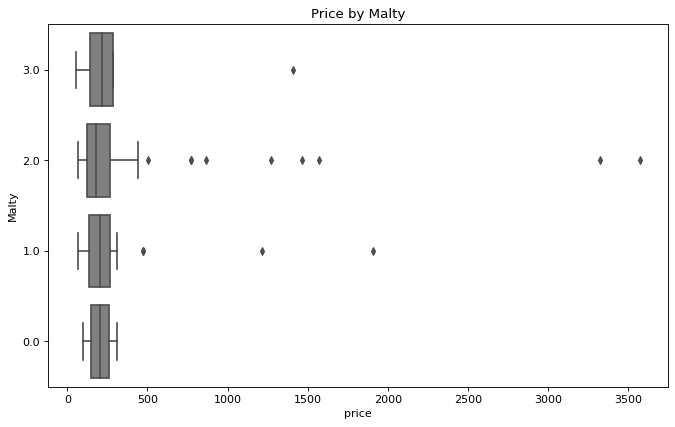

In [ ]:
# Boxplot of Price by Malty
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "price", y = "Malty", orient = "h", data = whiskyMerged, color = 'gray').set_title('Price by Malty')
plt.gca().invert_yaxis()

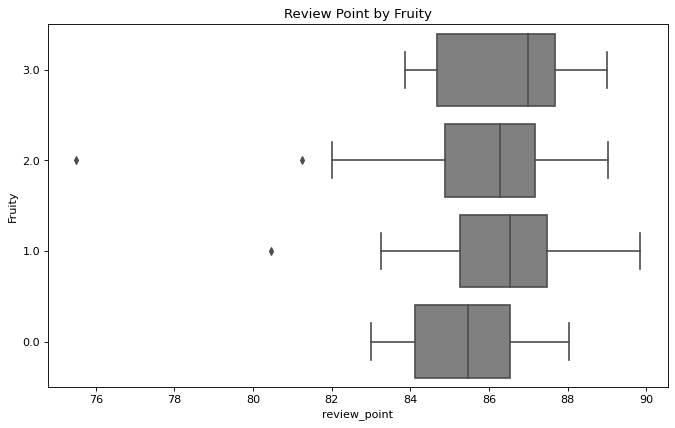

In [ ]:
# Boxplot of Review Point by Fruity
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "review_point", y = "Fruity", orient = "h", data = whiskyMerged, color = 'grey').set_title('Review Point by Fruity')
plt.gca().invert_yaxis()

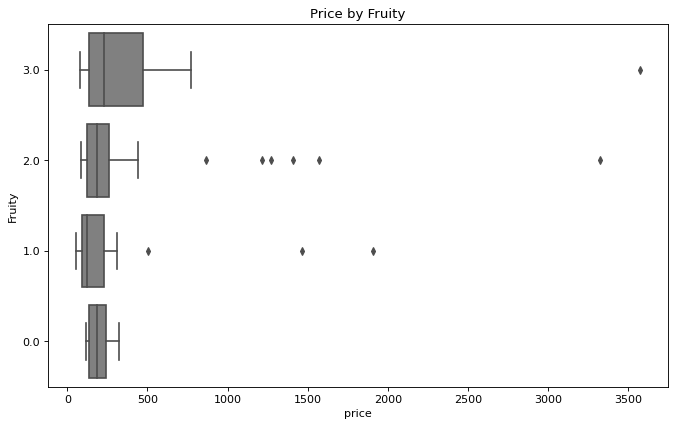

In [ ]:
# Boxplot of Price by Fruity
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "price", y = "Fruity", orient = "h", data = whiskyMerged, color = 'grey').set_title('Price by Fruity')
plt.gca().invert_yaxis()

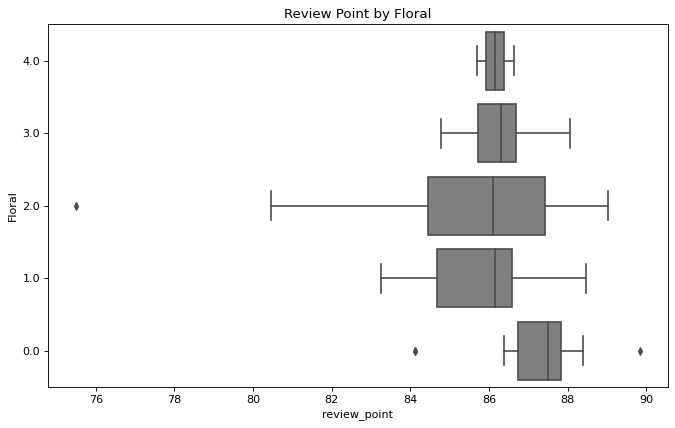

In [ ]:
# Boxplot of Review Point by Floral
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "review_point", y = "Floral", orient = "h", data = whiskyMerged, color = 'gray').set_title('Review Point by Floral')
plt.gca().invert_yaxis()

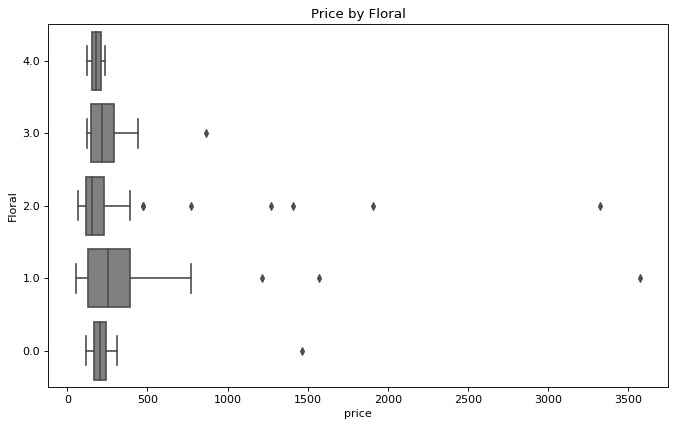

In [ ]:
# Boxplot of Price by Floral
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "price", y = "Floral", orient = "h", data = whiskyMerged, color = 'gray').set_title('Price by Floral')
plt.gca().invert_yaxis()

<function matplotlib.pyplot.show>

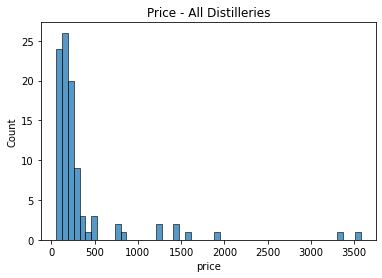

In [ ]:
# Histogram of all prices
sns.histplot(data=whiskyMerged, x = 'price').set_title('Price - All Distilleries')
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


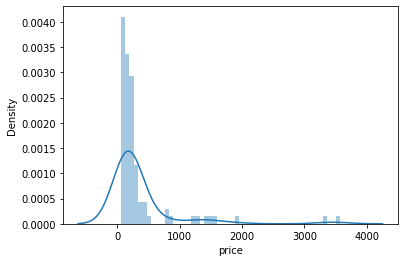

In [ ]:
# Density Plot of all Whisky Prices
x = whiskyMerged['price']
ax = sns.distplot(x)

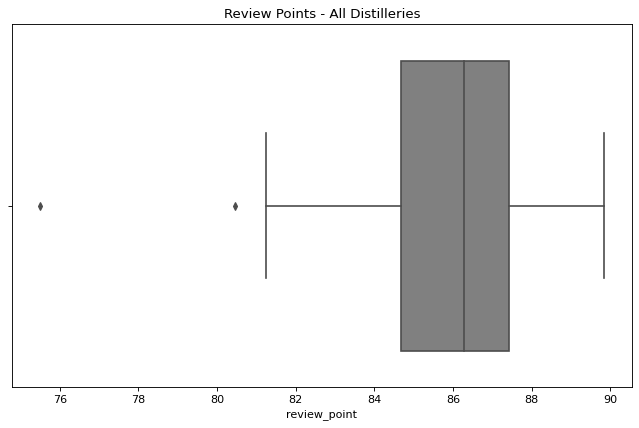

In [ ]:
# Boxplot of Review Points
figure(figsize=(10, 6), dpi=80)
sns.boxplot(x = "review_point", orient = "h", data = whiskyMerged, color = 'grey').set_title('Review Points - All Distilleries')
plt.show()

<function matplotlib.pyplot.show>

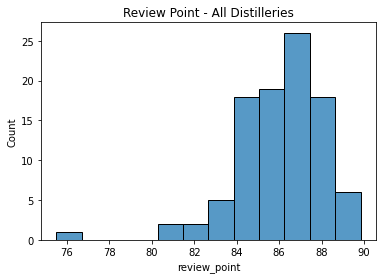

In [ ]:
# Histogram of all review points
sns.histplot(data=whiskyMerged, x = 'review_point').set_title('Review Point - All Distilleries')
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Review Point')

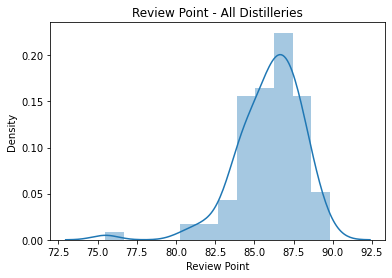

In [ ]:
# Density Plot of all Review Points
x = whiskyMerged['review_point']
sns.set_color_codes()
ax = sns.distplot(x).set_title('Review Point - All Distilleries')
plt.xlabel('Review Point')

<function matplotlib.pyplot.show>

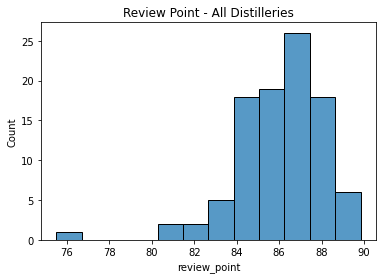

In [ ]:
sns.histplot(data=whiskyMerged, x = 'review_point').set_title('Review Point - All Distilleries')
plt.show

Try out some maps

In [17]:
# Install geopandas for map plotting
!pip install geopandas

     |████████████████████████████████| 1.0 MB 16.6 MB/s 
     |████████████████████████████████| 6.3 MB 23.4 MB/s 
     |████████████████████████████████| 15.4 MB 34.0 MB/s 


In [18]:
# Needed for map, lat, long plotting
import descartes
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon

%matplotlib inline

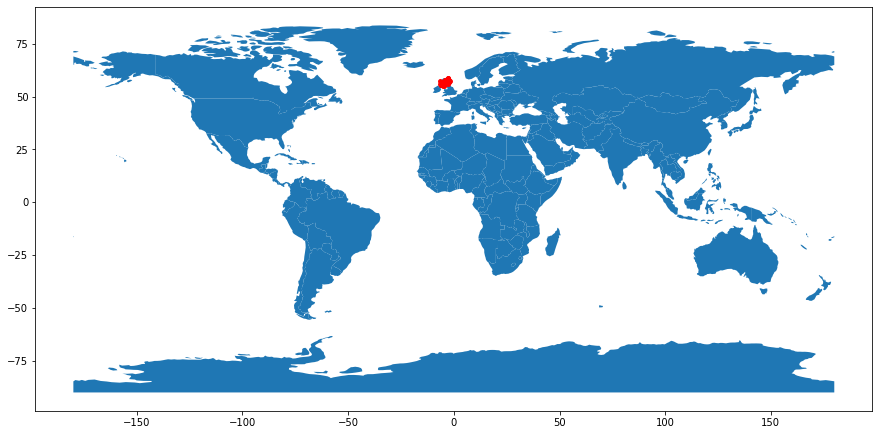

In [19]:
# Plot on a world map, not interactive though
geometry = [Point(xy) for xy in zip(whiskyMerged['Longitude'], whiskyMerged['Latitude'])]
gdf = GeoDataFrame(whiskyMerged, geometry=geometry) 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='red', markersize=15);

In [ ]:
# Interactive Map - using Europe
import plotly.express as px
fig = px.scatter_geo(whiskyMerged,lat='Latitude',lon='Longitude', hover_name="Distillery")
fig.update_layout(geo_scope='europe', title = 'Europe', title_x=0.5)
fig.show()